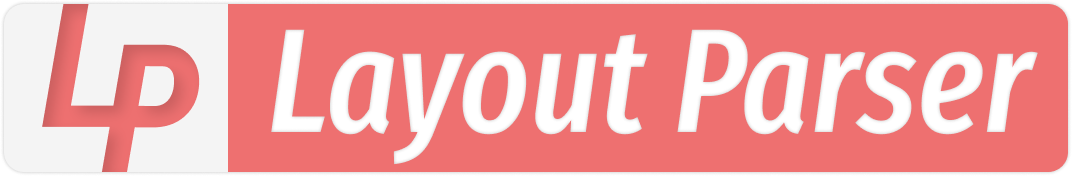

# 01 Introduction to Deep Layout parsering

*   https://layout-parser.readthedocs.io/en/latest/example/deep_layout_parsing/index.html
*   https://github.com/Layout-Parser/layout-parser





# 02 Installation 


*   install tesseract original and  thai as example 01-02
*   install layoutparser
*   install ocr for layout parser
*   install layout detection by  EfficientDet (effdet)  https://arxiv.org/abs/1911.09070v7
*   install layout detection by  detectron2 https://github.com/facebookresearch/detectron2


*หมายเหตุ * ใน colab ต้อง install ใหม่ทุกครั้ง เเละหลังจาก install ด้วย cell ด้านล่างจำเป็นต้อง Restart Runtime ใหม่

In [ ]:
!pip install layoutparser
!pip install -U "layoutparser[ocr]"
!pip install "layoutparser[effdet]"
!pip install layoutparser torchvision && pip install "git+https://github.com/facebookresearch/detectron2.git@v0.5#egg=detectron2"

!apt install tesseract-ocr
!apt install tesseract-ocr-tha
!apt install libtesseract-dev

     |████████████████████████████████| 19.2 MB 685 kB/s 
     |████████████████████████████████| 596 kB 47.6 MB/s 
     |████████████████████████████████| 46 kB 4.6 MB/s 
     |████████████████████████████████| 5.6 MB 42.4 MB/s 
     |████████████████████████████████| 4.3 MB 40.5 MB/s 
     |████████████████████████████████| 139 kB 75.2 MB/s 
     |████████████████████████████████| 3.6 MB 47.0 MB/s 
  Created wheel for pdfplumber: filename=pdfplumber-0.6.0-py3-none-any.whl size=33688 sha256=ec86270454a20cbed74bc74b47c9948fc5c3e1c270052e1267f31b803f7d098e
  Stored in directory: /root/.cache/pip/wheels/58/56/fe/2e93d842ffa9ea97746c1ab253d43502ed61c0689361a0224e
Successfully built pdfplumber
  Attempting uninstall: pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


     |████████████████████████████████| 435 kB 12.7 MB/s 
  Created wheel for pytesseract: filename=pytesseract-0.3.8-py2.py3-none-any.whl size=14070 sha256=af5bbb896f1200fa89e895c004c3b3bf80fb4dfa2e4fb6bbd13d5aad058af0ba
  Stored in directory: /root/.cache/pip/wheels/a4/89/b9/3f11250225d0f90e5454fcc30fd1b7208db226850715aa9ace
Successfully built pytesseract


     |████████████████████████████████| 112 kB 10.1 MB/s 
     |████████████████████████████████| 431 kB 51.1 MB/s 
     |████████████████████████████████| 74 kB 3.4 MB/s 
     |████████████████████████████████| 112 kB 70.7 MB/s 
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.8-py3-none-any.whl size=141230 sha256=5b9b8e83b2be49e3bb383371747098910df2849b6b79a926e350a6f77928eea7
  Stored in directory: /root/.cache/pip/wheels/ca/33/b7/336836125fc9bb4ceaa4376d8abca10ca8bc84ddc824baea6c
Successfully built antlr4-python3-runtime


  Cloning https://github.com/facebookresearch/detectron2.git (to revision v0.5) to /tmp/pip-install-3_v8_p8g/detectron2_106a2124235c486c9b51801c480e91d3
  Running command git clone -q https://github.com/facebookresearch/detectron2.git /tmp/pip-install-3_v8_p8g/detectron2_106a2124235c486c9b51801c480e91d3
  Running command git checkout -q 82a57ce0b70057685962b352535147d9a8118578
     |████████████████████████████████| 55 kB 2.7 MB/s 
     |████████████████████████████████| 145 kB 14.4 MB/s 
     |████████████████████████████████| 130 kB 58.8 MB/s 
     |████████████████████████████████| 748 kB 58.3 MB/s 
     |████████████████████████████████| 843 kB 43.0 MB/s 
  Created wheel for detectron2: filename=detectron2-0.5-cp37-cp37m-linux_x86_64.whl size=5348975 sha256=473290d63185a309377f65d142aa0f56bc04dfc3dcf224c5ec29c9db20c51ff3
  Stored in directory: /tmp/pip-ephem-wheel-cache-vwqgurrd/wheels/75/69/b4/caca235626d537eca323727494360664a9e97b82b570e78fcd
  Created wheel for fvcore: filename=

#03 Load Example Image file

*   upload image file ด้วย google.colab.files.upload
*   download file exmaple ที่ link ... ([link images](https://drive.google.com/drive/folders/14lap7HCmM7TjSnyfQS0ptL7lIzchk8TM?usp=sharing)) เลือกไฟล์ **paper-image.jpg**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving paper-image.jpg to paper-image.jpg


In [ ]:
! ls

paper-image.jpg  sample_data


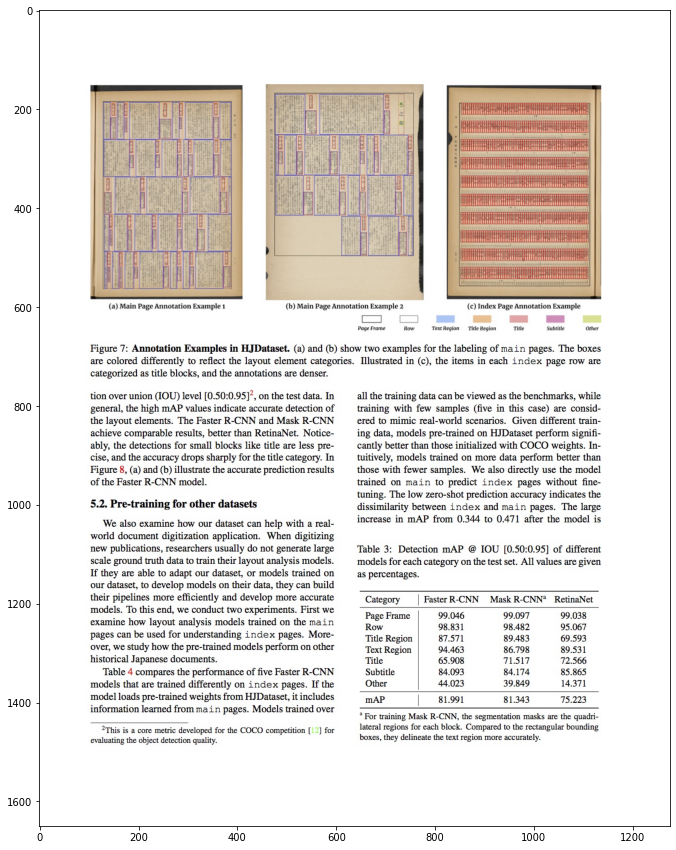

In [ ]:
#image = cv2.imread(path+"data/paper-image.jpg")
from skimage import io,transform
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline 

# BGR
image = cv2.imread("paper-image.jpg")

# conver BGR to RGB
image = image[..., ::-1] 

plt.figure(figsize=(15,15))
plt.imshow(image)
plt.show()

# 04 Layout Detection

## 4.1 layout detection with efficientdet

Load model pretrained
โดยใช้ effcientdet 

In [ ]:
import layoutparser as lp
import cv2

model = lp.AutoLayoutModel("lp://efficientdet/PubLayNet")

publaynet-tf_efficientdet_d0.pth.tar?dl=1: 47.1MB [00:01, 25.8MB/s]
Downloading: "https://github.com/rwightman/efficientdet-pytorch/releases/download/v0.1/tf_efficientdet_d0_34-f153e0cf.pth" to /root/.cache/torch/hub/checkpoints/tf_efficientdet_d0_34-f153e0cf.pth


In [ ]:
image = cv2.imread("paper-image.jpg")
layout = model.detect(image)
print("==Layout")
for b in layout:
    print(b)

==Layout
TextBlock(block=Rectangle(x_1=107.4345703125, y_1=766.251953125, x_2=603.448486328125, y_2=966.4990844726562), text=None, id=0, type=Text, parent=None, next=None, score=0.989176332950592)
TextBlock(block=Rectangle(x_1=95.17988586425781, y_1=1032.4234619140625, x_2=593.3127593994141, y_2=1322.4749755859375), text=None, id=0, type=Text, parent=None, next=None, score=0.986607551574707)
TextBlock(block=Rectangle(x_1=648.3778076171875, y_1=766.860595703125, x_2=1142.8927001953125, y_2=1047.5579833984375), text=None, id=0, type=Text, parent=None, next=None, score=0.975639283657074)
TextBlock(block=Rectangle(x_1=110.18547821044922, y_1=145.92112731933594, x_2=1159.1804733276367, y_2=644.3598480224609), text=None, id=0, type=Figure, parent=None, next=None, score=0.8899412155151367)
TextBlock(block=Rectangle(x_1=653.3796997070312, y_1=1174.4246826171875, x_2=1137.1553955078125, y_2=1420.4471435546875), text=None, id=0, type=Table, parent=None, next=None, score=0.772716760635376)
TextBl

/usr/local/lib/python3.7/dist-packages/effdet/bench.py:55: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  indices_all = cls_topk_indices_all // num_classes


In [ ]:
lp.draw_box(image, layout, box_width=3)
    # Show the detected layout of the input image

Output hidden; open in https://colab.research.google.com to view.

## 4.2 layout detection with efficientdet

Load model pretrained
# โดยใช้ detectron2 

In [ ]:
model = lp.Detectron2LayoutModel("lp://PubLayNet/faster_rcnn_R_50_FPN_3x/config", 
                                 extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.8],
                                 label_map={0: "Text", 1: "Title", 2: "List", 3:"Table", 4:"Figure"})


config.yml?dl=1: 8.19kB [00:01, 6.92kB/s]
model_final.pth?dl=1: 330MB [00:05, 64.5MB/s]
  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}


In [ ]:
layout = model.detect(image)
print("==Layout")
for b in layout:
    print(b)

/usr/local/lib/python3.7/dist-packages/detectron2/structures/image_list.py:99: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  max_size = (max_size + (stride - 1)) // stride * stride
/usr/local/lib/python3.7/dist-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


==Layout
TextBlock(block=Rectangle(x_1=648.9922485351562, y_1=1418.7113037109375, x_2=1132.6805419921875, y_2=1479.303955078125), text=None, id=None, type=Text, parent=None, next=None, score=0.9995978474617004)
TextBlock(block=Rectangle(x_1=106.12461853027344, y_1=1032.07470703125, x_2=599.2977905273438, y_2=1323.208984375), text=None, id=None, type=Text, parent=None, next=None, score=0.9981802701950073)
TextBlock(block=Rectangle(x_1=639.54736328125, y_1=773.1265869140625, x_2=1135.9765625, y_2=1044.6507568359375), text=None, id=None, type=Text, parent=None, next=None, score=0.9974864721298218)
TextBlock(block=Rectangle(x_1=104.36859130859375, y_1=767.3281860351562, x_2=595.1759643554688, y_2=970.4510498046875), text=None, id=None, type=Text, parent=None, next=None, score=0.9974320530891418)
TextBlock(block=Rectangle(x_1=107.37618255615234, y_1=1448.544189453125, x_2=598.3998413085938, y_2=1488.01611328125), text=None, id=None, type=Text, parent=None, next=None, score=0.995351791381835

In [ ]:
lp.draw_box(image, layout, box_width=3)
    # Show the detected layout of the input image

Output hidden; open in https://colab.research.google.com to view.


## 4.3 Test with thai paper

*   upload image file ด้วย google.colab.files.upload
*   download file exmaple ที่ link ... ([link images](https://drive.google.com/drive/folders/14lap7HCmM7TjSnyfQS0ptL7lIzchk8TM?usp=sharing)) เลือกไฟล์ **paper-thai.PNG**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving paper-thai.PNG to paper-thai.PNG


In [ ]:
model = lp.AutoLayoutModel("lp://efficientdet/PubLayNet")

==Layout
TextBlock(block=Rectangle(x_1=63.00267028808594, y_1=514.2891235351562, x_2=477.8153533935547, y_2=653.4389038085938), text=None, id=0, type=Text, parent=None, next=None, score=0.8196057081222534)
TextBlock(block=Rectangle(x_1=99.20983123779297, y_1=248.0294647216797, x_2=440.89647674560547, y_2=432.0927429199219), text=None, id=0, type=Figure, parent=None, next=None, score=0.7063689827919006)
TextBlock(block=Rectangle(x_1=61.90440368652344, y_1=47.74138259887695, x_2=479.0301971435547, y_2=223.82378005981445), text=None, id=0, type=Text, parent=None, next=None, score=0.5326956510543823)
TextBlock(block=Rectangle(x_1=97.20353698730469, y_1=445.8918151855469, x_2=446.88694763183594, y_2=464.6527404785156), text=None, id=0, type=Text, parent=None, next=None, score=0.40864837169647217)
TextBlock(block=Rectangle(x_1=98.44219970703125, y_1=492.09735107421875, x_2=247.17889404296875, y_2=506.1866760253906), text=None, id=0, type=Title, parent=None, next=None, score=0.298895448446273

/usr/local/lib/python3.7/dist-packages/effdet/bench.py:55: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  indices_all = cls_topk_indices_all // num_classes


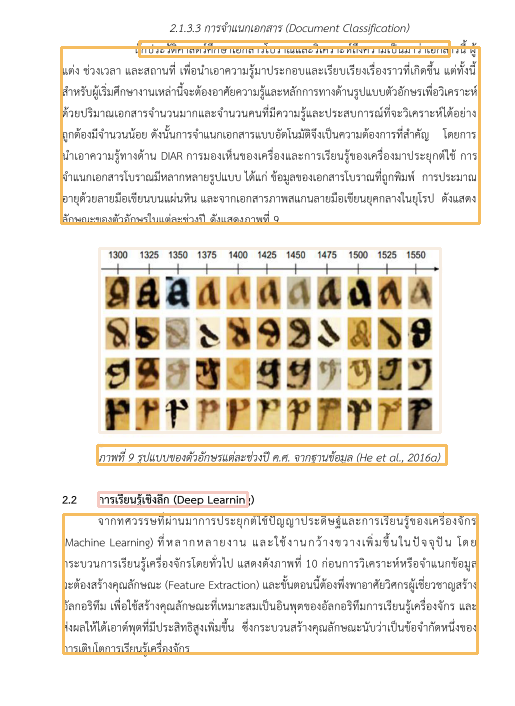

In [ ]:
image = cv2.imread("paper-thai.PNG")
image = image[..., ::-1] 
layout = model.detect(image)
print("==Layout")
for b in layout:
    print(b)
lp.draw_box(image, layout, box_width=3)

## 4.4 Thai ocr with only text layout 

create ocr of thai lang tesseract agent

In [ ]:
ocr_agent = lp.TesseractAgent(languages='tha') 

Filter only text or title blocks

In [ ]:
text_blocks = lp.Layout([b for b in layout if b.type=='Text' or b.type=='Title'])
figure_blocks = lp.Layout([b for b in layout if b.type=='Figure'])
text_blocks = lp.Layout([b for b in text_blocks \
                   if not any(b.is_in(b_fig) for b_fig in figure_blocks)])

Loop each block and send to agent to ocr

In [ ]:
for block in text_blocks:
    segment_image = (block
                       .pad(left=5, right=5, top=5, bottom=5)
                       .crop_image(image))
        # add padding in each image segment can help
        # improve robustness 
    print(segment_image.shape)
    text = ocr_agent.detect(segment_image)
    block.set(text=text, inplace=True)

(149, 424, 3)
(186, 428, 3)
(29, 359, 3)
(24, 159, 3)
(25, 320, 3)


Print result

In [ ]:
for txt in text_blocks.get_texts():
    print(txt, end='\n---\n')

จจากทศวรรษที่ผ่านมาการประยุกต์ใช้ปัญญาประดิษฐ์และการเรียนรู้ของเครื่องจักร
(หลผ่พท6 เอลทท่ทดู) ที่หลากหลายงาน และใช้งานกว้างขวางเพิ่มขึ้นในปัจจุปัน โดย
กระบวนการเรียนรู้เครื่องจักรโดยทั่วไป แสดงตังภาพที่ 10 ก่อนการวิเคราะห์หรือจําแนกข้อมูล
จะต้องสร้างคุณลักษณะ ("@ธ๕ 5ะหล๕ม์อก) และขั้นตอนนี้ต้องพึ่งพาอาศัยวิศกรผู้เชี่ยวชาญสร้าง
อัลกอริทีม เพื่อใช้สร้างคุณลักษณะที่เหมาะสมเป็นอินพุตของอัลกอริทีมการเรียนรู้เครื่องจักร และ.
ส่งผลให้ได้เฮาต์พุตที่มีประสิทธิสูงเพิ่มขึ้น ซึ่งกระบวนสร้างคุณลักษณะนับว่าเป็นข้อจํากัดหนึ่งของ
การเติบโตการเรียนรู้เครื่องจักร

---
.นักประวัติศาสตร์ศึกษาเอกสารโบราณและวิเคราะห์ถึงความเป็นมาว่าเอกสารนี ผู้
แต่ง ช่วงเวลา และสถานที่ เพื่อนําเอาความรู้มาประกอบและเรียบเรียงเรื่องราวที่เกิดขึ้น แต่ทั้งนี้
สําหรับผู้เริ่มศึกษางานเหล่านี้จะต้องอาศัยความรู้และหลักการทางด้านรูปแบบตัวอักษรเพื่อวิเคราะห์
ด้วยปริมาณเอกสารจํานวนมากและจํานวนคนที่มีความรู้และประสบการณ์ที่จะวิเคราะห์ไต้อย่าง
ถูกต้องมีจํานวนน้อย ดังนั้นการจําแนกเอกสารแบบอัตโนมัติจึงเป็นความต้องการที่สําคัญ โดยการ
นําเ